In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dm-test/pred_12.csv
/kaggle/input/dm-test/pred_36.csv
/kaggle/input/dm-test/pred_24.csv
/kaggle/input/optimizer/pred_12.csv
/kaggle/input/optimizer/pred_36.csv
/kaggle/input/optimizer/pred_24.csv
/kaggle/input/metrics/metric.csv
/kaggle/input/samples/samples/2022-2023-11_48_test.csv
/kaggle/input/samples/samples/2022-2023.csv
/kaggle/input/samples/samples/2022-2023-11_test.csv
/kaggle/input/samples/samples/2022-2023-11_train.csv
/kaggle/input/samples/samples/2022-2023-11_90test.csv
/kaggle/input/samples/samples/2022-2023-11_96test.csv
/kaggle/input/prediction/24.csv
/kaggle/input/prediction/36.csv
/kaggle/input/prediction/12.csv
/kaggle/input/itransformer-prediction/iTransformer/24.csv
/kaggle/input/itransformer-prediction/iTransformer/36.csv
/kaggle/input/itransformer-prediction/iTransformer/12.csv
/kaggle/input/na-mvmd/NA-MVMD/90-test.csv
/kaggle/input/na-mvmd/NA-MVMD/train.csv
/kaggle/input/na-mvmd/NA-MVMD/test.csv


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import ConnectionPatch
import matplotlib.dates as mdates
import datetime as dt

In [3]:
data = pd.read_csv('/kaggle/input/samples/samples/2022-2023.csv')

In [5]:
a = np.array(data['load'])
b = np.array(data['T'])
c = np.array(data['Td'])

In [7]:
def turn(RGB):
    rgb_0_to_255 = RGB
    # 将其转换为0-1范围
    rgb_0_to_1 = tuple(value / 255 for value in rgb_0_to_255)
    return rgb_0_to_1
#三色
R1 = (87,195,190) 
R2 = (243,119,109)
R3 = (109,147,203)
r1 = turn(R1)
r2 = turn(R2)
r3 = turn(R3)

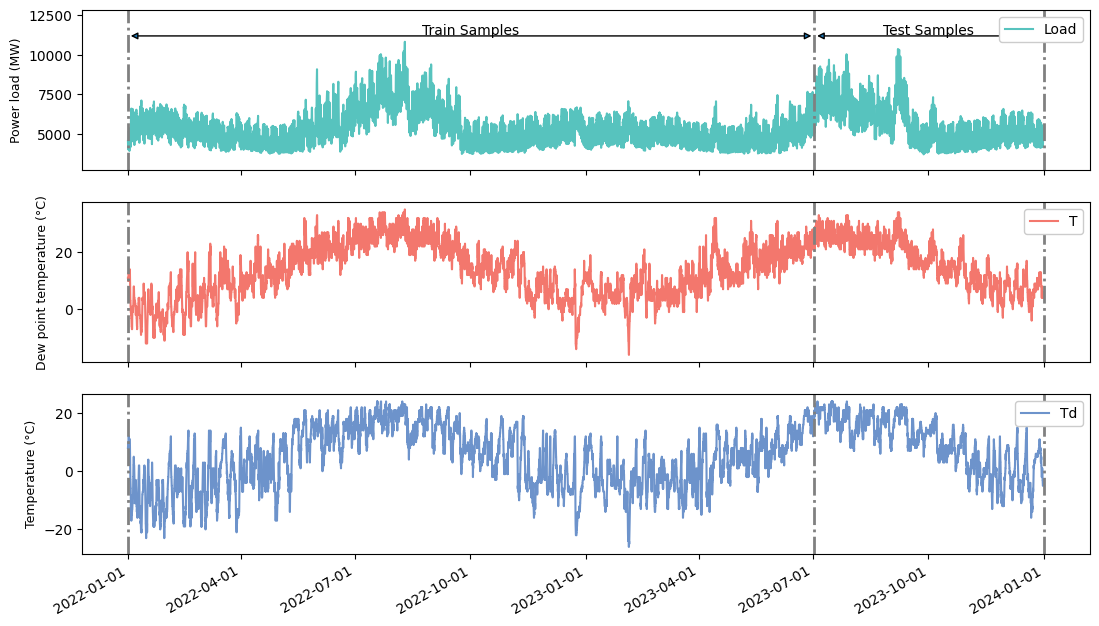

In [8]:
data['date'] = pd.to_datetime(data['date'])
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize = (13, 8))
hline_time1 = dt.datetime(2023, 7, 2)
hline_time2 = dt.datetime(2022, 1, 1)
hline_time3 = dt.datetime(2024, 1, 1)
hline_time4 = dt.datetime(2022, 10, 1)
hline_time5 = dt.datetime(2023, 10, 1)
ylim0 = np.min(a)-1000
ylim1 = np.max(a)+2000
        
ax1.set_ylim(ylim0, ylim1)
ax1.plot(data['date'],a,color =r1,label='Load' )
#ax.set_ylabel('Close oil future price')
#ax.set_xlabel('hour')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# 美化x轴日期显示
plt.gcf().autofmt_xdate()
ax1.legend(loc='upper right', framealpha=1, facecolor='white')
ax1.axvline(x = hline_time1, c = 'grey', ls = '-.', lw = 2)
ax1.axvline(x = hline_time2, c = 'grey', ls = '-.', lw = 2)
ax1.axvline(x = hline_time3, c = 'grey', ls = '-.', lw = 2)
mid_point1= (hline_time4, 11500)
mid_point2= (hline_time5, 11500)
ax1.text(mid_point1[0], mid_point1[1], 'Train Samples', ha='center', va='center')
ax1.text(mid_point2[0], mid_point2[1], 'Test Samples', ha='center', va='center')
ax1.annotate('', xytext=(hline_time2, 11200), xy=(hline_time1,11200),arrowprops=dict(arrowstyle="<|-|>", connectionstyle="arc3"))
ax1.annotate('', xytext=(hline_time1, 11200), xy=(hline_time3,11200),arrowprops=dict(arrowstyle="<|-|>", connectionstyle="arc3"))
#ylim0 = min(b.min(),c.min())-1
#ylim1 = max(b.min(),c.min())+1
ax3.set_ylabel('Temperature (°C)', fontsize=9)        
#ax2.set_ylim(ylim0, ylim1)
ax2.plot(data['date'],b,color =r2 ,label='T')

#ax.set_ylabel('Close oil future price')
#ax.set_xlabel('hour')
ax2.legend(loc='upper right', framealpha=1, facecolor='white')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
 
# 美化x轴日期显示
plt.gcf().autofmt_xdate()
ax2.axvline(x = hline_time1, c = 'grey', ls = '-.', lw = 2)
ax2.axvline(x = hline_time2, c = 'grey', ls = '-.', lw = 2)
ax2.axvline(x = hline_time3, c = 'grey', ls = '-.', lw = 2)
ax2.set_ylabel('Dew point temperature (°C)', fontsize=9)

ax3.plot(data['date'],c,color =r3,label='Td' )
#ax.set_ylabel('Close oil future price')
#ax.set_xlabel('hour')
ax3.legend(loc='upper right', framealpha=1, facecolor='white')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
 
# 美化x轴日期显示
plt.gcf().autofmt_xdate()
ax3.axvline(x = hline_time1, c = 'grey', ls = '-.', lw = 2)
ax3.axvline(x = hline_time2, c = 'grey', ls = '-.', lw = 2)
ax3.axvline(x = hline_time3, c = 'grey', ls = '-.', lw = 2)

ax1.set_ylabel('Power load (MW)', fontsize=9)

files = 'Full samples fitted plot.png'
savedir = '/kaggle/working/'
des_path = os.path.join(savedir,files)
plt.savefig(des_path, dpi = 300)

In [9]:
train = pd.read_csv('/kaggle/input/na-mvmd/NA-MVMD/train.csv')

In [10]:
load = pd.concat([train['t_3'],train['t_6'],train['t_9'],train['t_12'],train['t_15'],train['t_18'],train['t_21'],train['t_24'],train['t_27'],train['t_30'],train['t_33']],axis = 1)
Td = pd.concat([train['t_2'],train['t_5'],train['t_8'],train['t_11'],train['t_14'],train['t_17'],train['t_20'],train['t_23'],train['t_26'],train['t_29'],train['t_32']],axis = 1)
T = pd.concat([train['t_1'],train['t_4'],train['t_7'],train['t_10'],train['t_13'],train['t_16'],train['t_19'],train['t_22'],train['t_25'],train['t_28'],train['t_31']],axis = 1)

In [11]:
#load = pd.concat([train['t1_3'],train['t1_6'],train['t1_9'],train['t1_12'],train['t1_15'],train['t1_18'],train['t1_21'],train['t1_24'],train['t1_27'],train['t1_30'],train['t1_33']],axis = 1)
#Td = pd.concat([train['t1_2'],train['t1_5'],train['t1_8'],train['t1_11'],train['t1_14'],train['t1_17'],train['t1_20'],train['t1_23'],train['t1_26'],train['t1_29'],train['t1_32']],axis = 1)
#T = pd.concat([train['t1_1'],train['t1_4'],train['t1_7'],train['t1_10'],train['t1_13'],train['t1_16'],train['t1_19'],train['t1_22'],train['t1_25'],train['t1_28'],train['t1_31']],axis = 1)

In [12]:
load = np.array(load.T)
Td = np.array(Td.T)
T = np.array(T.T)

In [13]:
def turn(RGB):
    rgb_0_to_255 = RGB
    # 将其转换为0-1范围
    rgb_0_to_1 = tuple(value / 255 for value in rgb_0_to_255)
    return rgb_0_to_1


In [17]:
colors = {
    'R0': (78, 190, 238),
    'R1': (217, 82, 24),
    'R2': (238, 175, 30),
    'R3': (126, 46, 141),
    'R4': (0, 113, 189),
    'R5': (120, 172, 48),
    'R6': (163, 20, 48),
    'R7': (239, 166, 102),
    'R8': (0, 113, 189),
    'R9': (153, 135, 206),
    'R10': (99, 178, 238)
}

# 使用字典推导式将所有颜色转换为0-1范围
colors_0_to_1 = {name: turn(rgb) for name, rgb in colors.items()}

# 如果需要访问特定的颜色值
r0 = colors_0_to_1['R0']
r1 = colors_0_to_1['R1']
r2 = colors_0_to_1['R2']
r3 = colors_0_to_1['R3']
r4 = colors_0_to_1['R4']
r5 = colors_0_to_1['R5']
r6 = colors_0_to_1['R6']
r7 = colors_0_to_1['R7']
r8 = colors_0_to_1['R8']
r9 = colors_0_to_1['R9']
r10 = colors_0_to_1['R10']

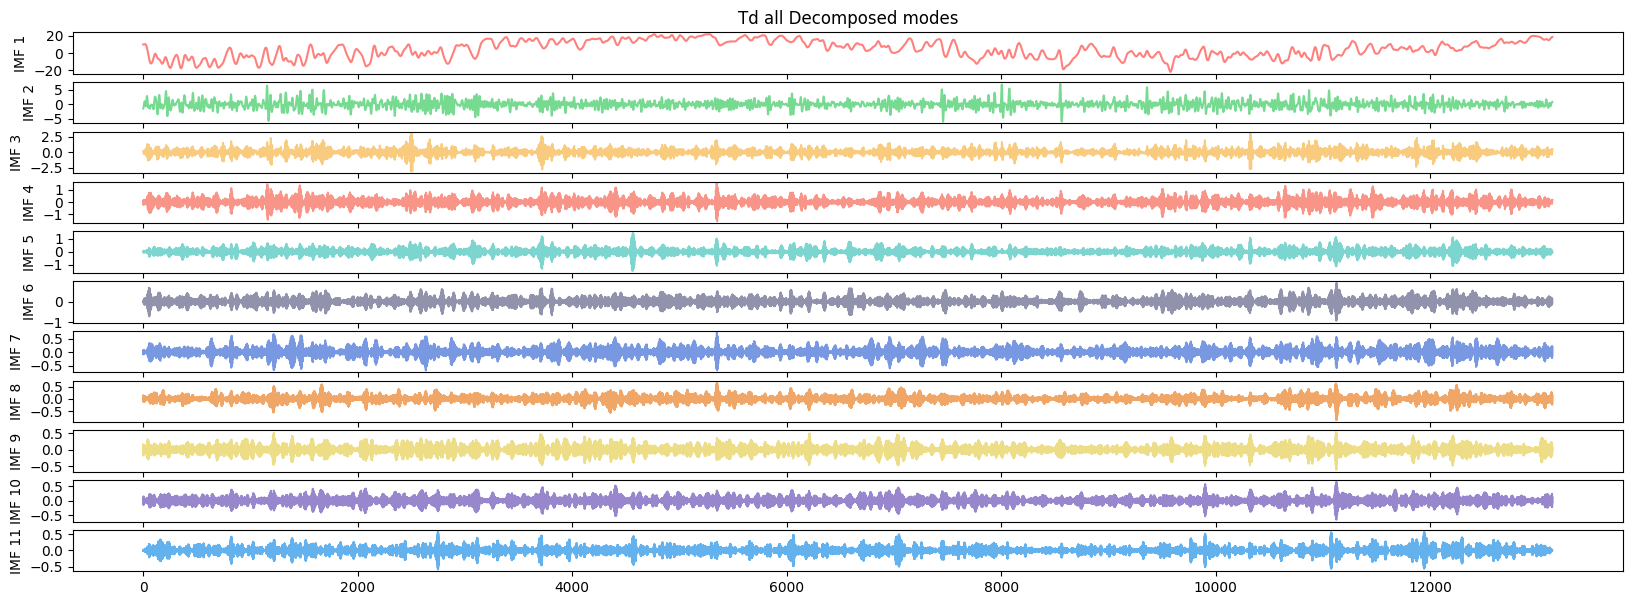

In [14]:
colors = [r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10]

plt.figure(figsize=(20, 7))
K= 11
for i  in range(K):
    plt.subplot(K, 1, i + 1)
    a = Td[i,:]
    plt.plot(a,color =colors[i])
    plt.ylabel('IMF {}'.format(i + 1))
    if i == 0:
        plt.title('Td all Decomposed modes')
files = 'Td all Decomposed modes.png'
savedir = '/kaggle/working/'
des_path = os.path.join(savedir,files)
plt.savefig(des_path, dpi = 300)
plt.show()


In [6]:
data =  pd.read_csv('/kaggle/input/metrics/metric.csv')

In [7]:
data = data.iloc[:,:8]

In [8]:
a = np.array(data.iloc[:15,:])
b = np.array(data.iloc[15:30,:])
c =np.array(data.iloc[30:45,:])
a = a.reshape(1,3,5,-1)
b = b.reshape(1,3,5,-1)
c = c.reshape(1,3,5,-1)
d = np.concatenate((a, b, c), axis=0)

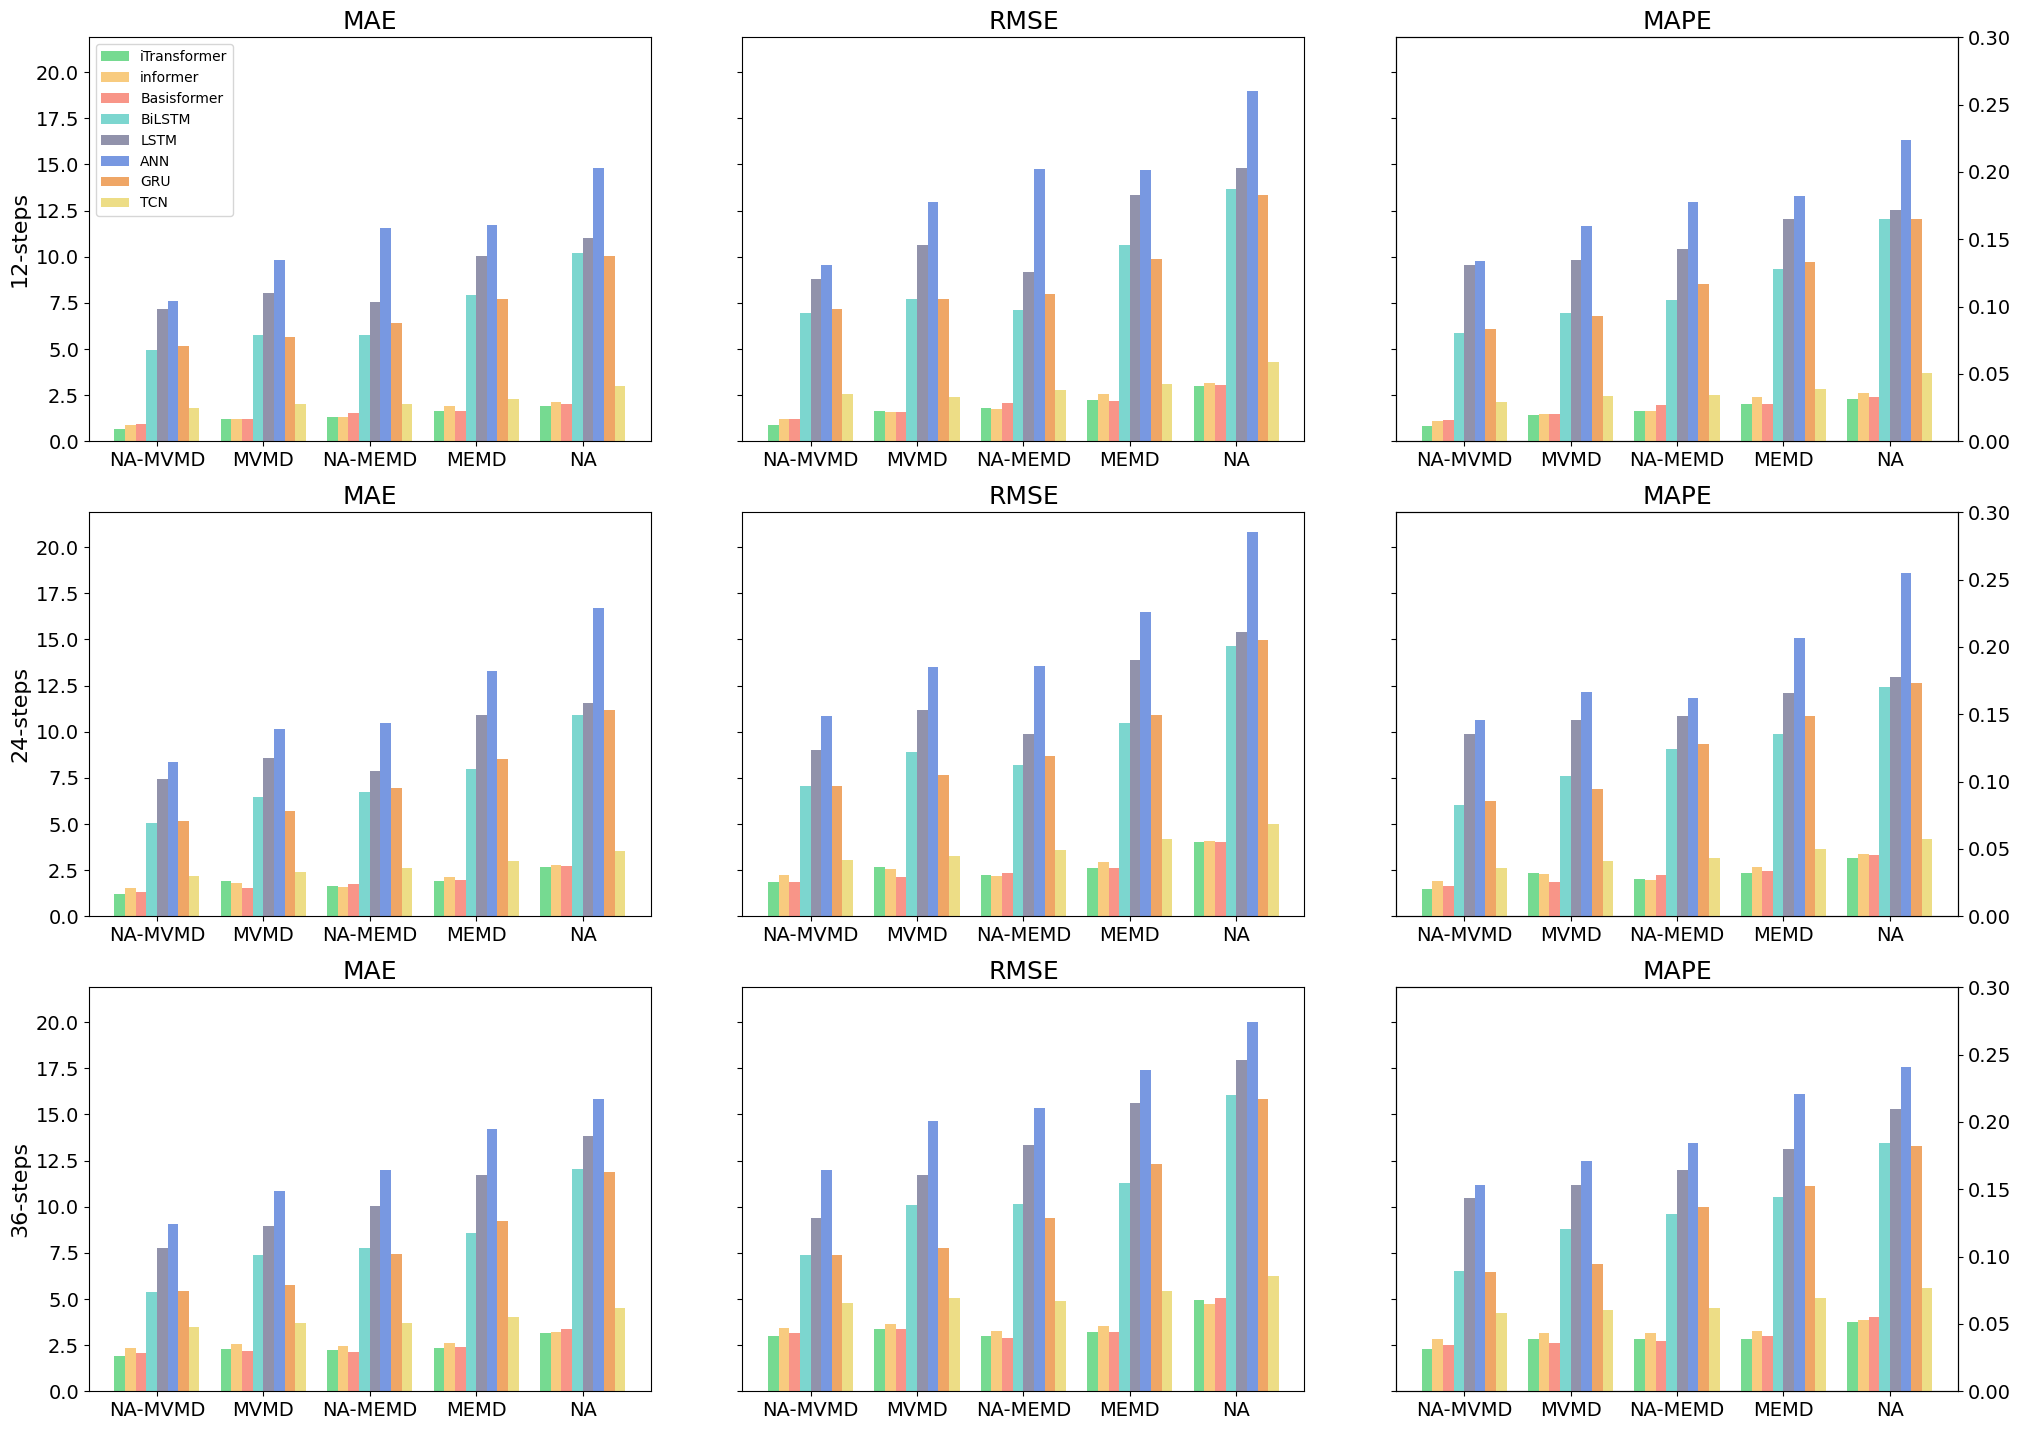

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['NA-MVMD', 'MVMD', 'NA-MEMD', 'MEMD', 'NA']
models = ['iTransformer', 'informer', 'Basisformer', 'BiLSTM', 'LSTM', 'ANN' ,'GRU', 'TCN']


y_limit_mape = (0, 0.3)

# Steps, cities, and MAE categories
steps = ['12-steps', '24-steps', '36-steps']
cities = ['MAE', 'RMSE','MAPE']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15), sharey=True)

bar_width = 0.1  # Width of each bar
num_models = len(models)
bar_positions = np.arange(len(categories))
plt.subplots_adjust(wspace=6, hspace=1)
for i, step in enumerate(steps):
    for j, city in enumerate(cities):
        ax = axes[i, j]
        ax.set_title(city, fontsize=18)  # Set the subplot title font size
        if j == 0:
            ax.set_ylabel(step, fontsize=16)  # Set the y-axis label font size
            for k, model in enumerate(models):
                # Position the bars within each category
                ax.bar(bar_positions + (k - num_models/2) * bar_width + bar_width/2, d[i, j, :, k], width=bar_width, color=colors[k], label=model if i == 0 and j == 0 else "")
        if j == 1:
            for k, model in enumerate(models):
                # Position the bars within each category
                ax.bar(bar_positions + (k - num_models/2) * bar_width + bar_width/2, d[i, j, :, k], width=bar_width, color=colors[k], label=model if i == 0 and j == 0 else "")
        
        if j == 2:
            
            ax_right = ax.twinx()
            ax_right.set_ylim(y_limit_mape)  # 设置右侧y轴的限制

            # 设置右侧y轴的标签和刻度字体大小
            ax_right.tick_params(axis='y', labelsize=14)
            for k, model in enumerate(models):
                # Position the bars within each category
                ax_right.bar(bar_positions + (k - num_models/2) * bar_width + bar_width/2, d[i, j, :, k], width=bar_width, color=colors[k], label=model if i == 0 and j == 0 else "")
        
        
        ax.set_xticks(bar_positions)
        ax.set_xticklabels(categories, fontsize=14)  # Set the x-tick labels font size
    
        

    

        ax.tick_params(axis='y', labelsize=14)  # Set the y-tick labels font size

# Set the legend font size

axes[0, 0].legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.96])
files = 'MAE,RMSE,MAPE.png'
savedir = '/kaggle/working/'
des_path = os.path.join(savedir,files)
plt.savefig(des_path, dpi = 300)

plt.show()

In [24]:
a = pd.read_csv('/kaggle/input/prediction/12.csv')
b= pd.read_csv('/kaggle/input/prediction/24.csv')
c = pd.read_csv('/kaggle/input/prediction/36.csv')

In [25]:
a = a.T
b = b.T
c = c.T

In [26]:
d = a.iloc[1:,:]
e = b.iloc[1:,:]
f = c.iloc[1:,:]

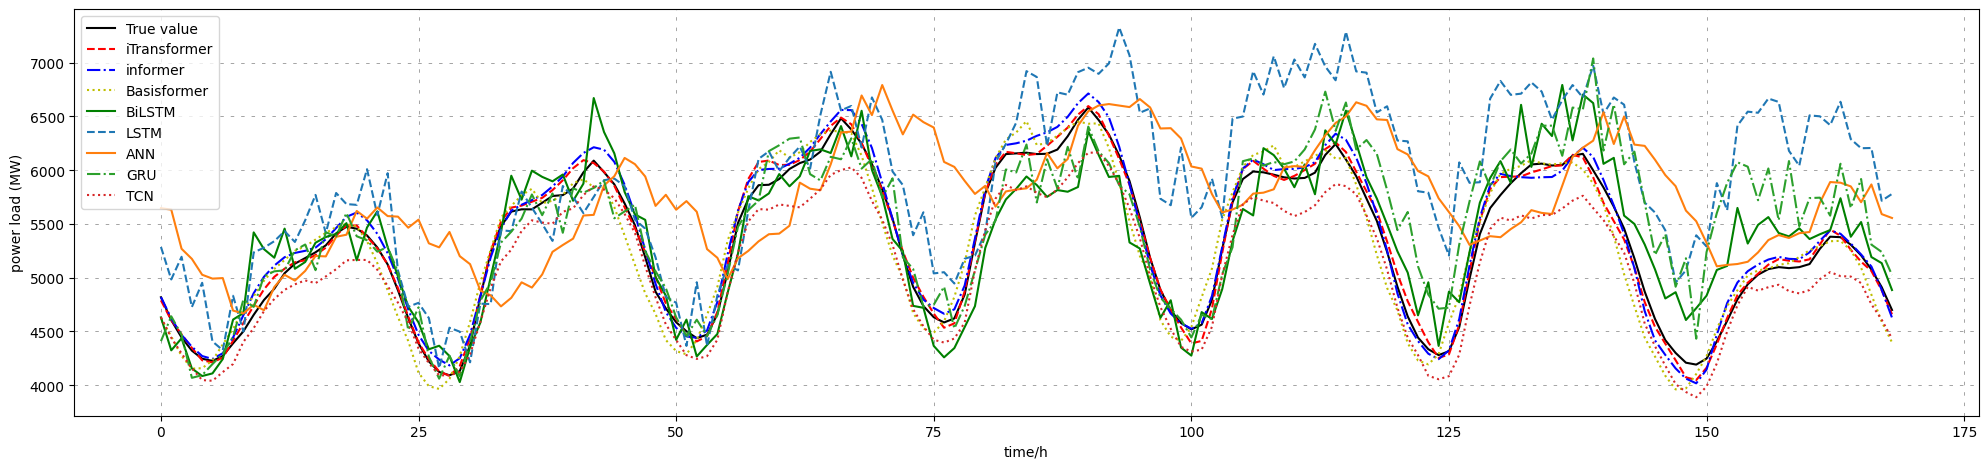

In [6]:
import matplotlib.pyplot as plt
import numpy as np


true_values = np.array(d.iloc[0,3503:3672])  # True values
iTransformer = np.array(d.iloc[1,3503:3672])
informer = np.array(d.iloc[2,3503:3672])
Basisformer = np.array(d.iloc[3,3503:3672])
BiLSTM = np.array(d.iloc[4,3503:3672])
LSTM = np.array(d.iloc[5,3503:3672])
ANN = np.array(d.iloc[6,3503:3672])
GRU = np.array(d.iloc[7,3503:3672])
TCN = np.array(d.iloc[8,3503:3672])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5), sharey=True)

ax.plot(true_values, 'k-', label='True value')
ax.plot(iTransformer, 'r--', label='iTransformer')
ax.plot(informer, 'b-.', label='informer')
ax.plot(Basisformer, 'y:', label='Basisformer')
ax.plot(BiLSTM, 'g-', label='BiLSTM')
ax.plot(LSTM, '--', label='LSTM')
ax.plot(ANN, '-', label='ANN')
ax.plot(GRU, '-.', label='GRU')
ax.plot(TCN, ':', label='TCN')




plt.xlabel('time/h')
plt.ylabel('power load (MW)')
plt.legend()
line_style = (0, (5, 10))
plt.grid(True, linestyle=line_style, color='gray', linewidth=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
files = '11-26Power Load Prediction-12steps.png'
savedir = '/kaggle/working/'
des_path = os.path.join(savedir,files)
plt.savefig(des_path, dpi = 300)

plt.show()

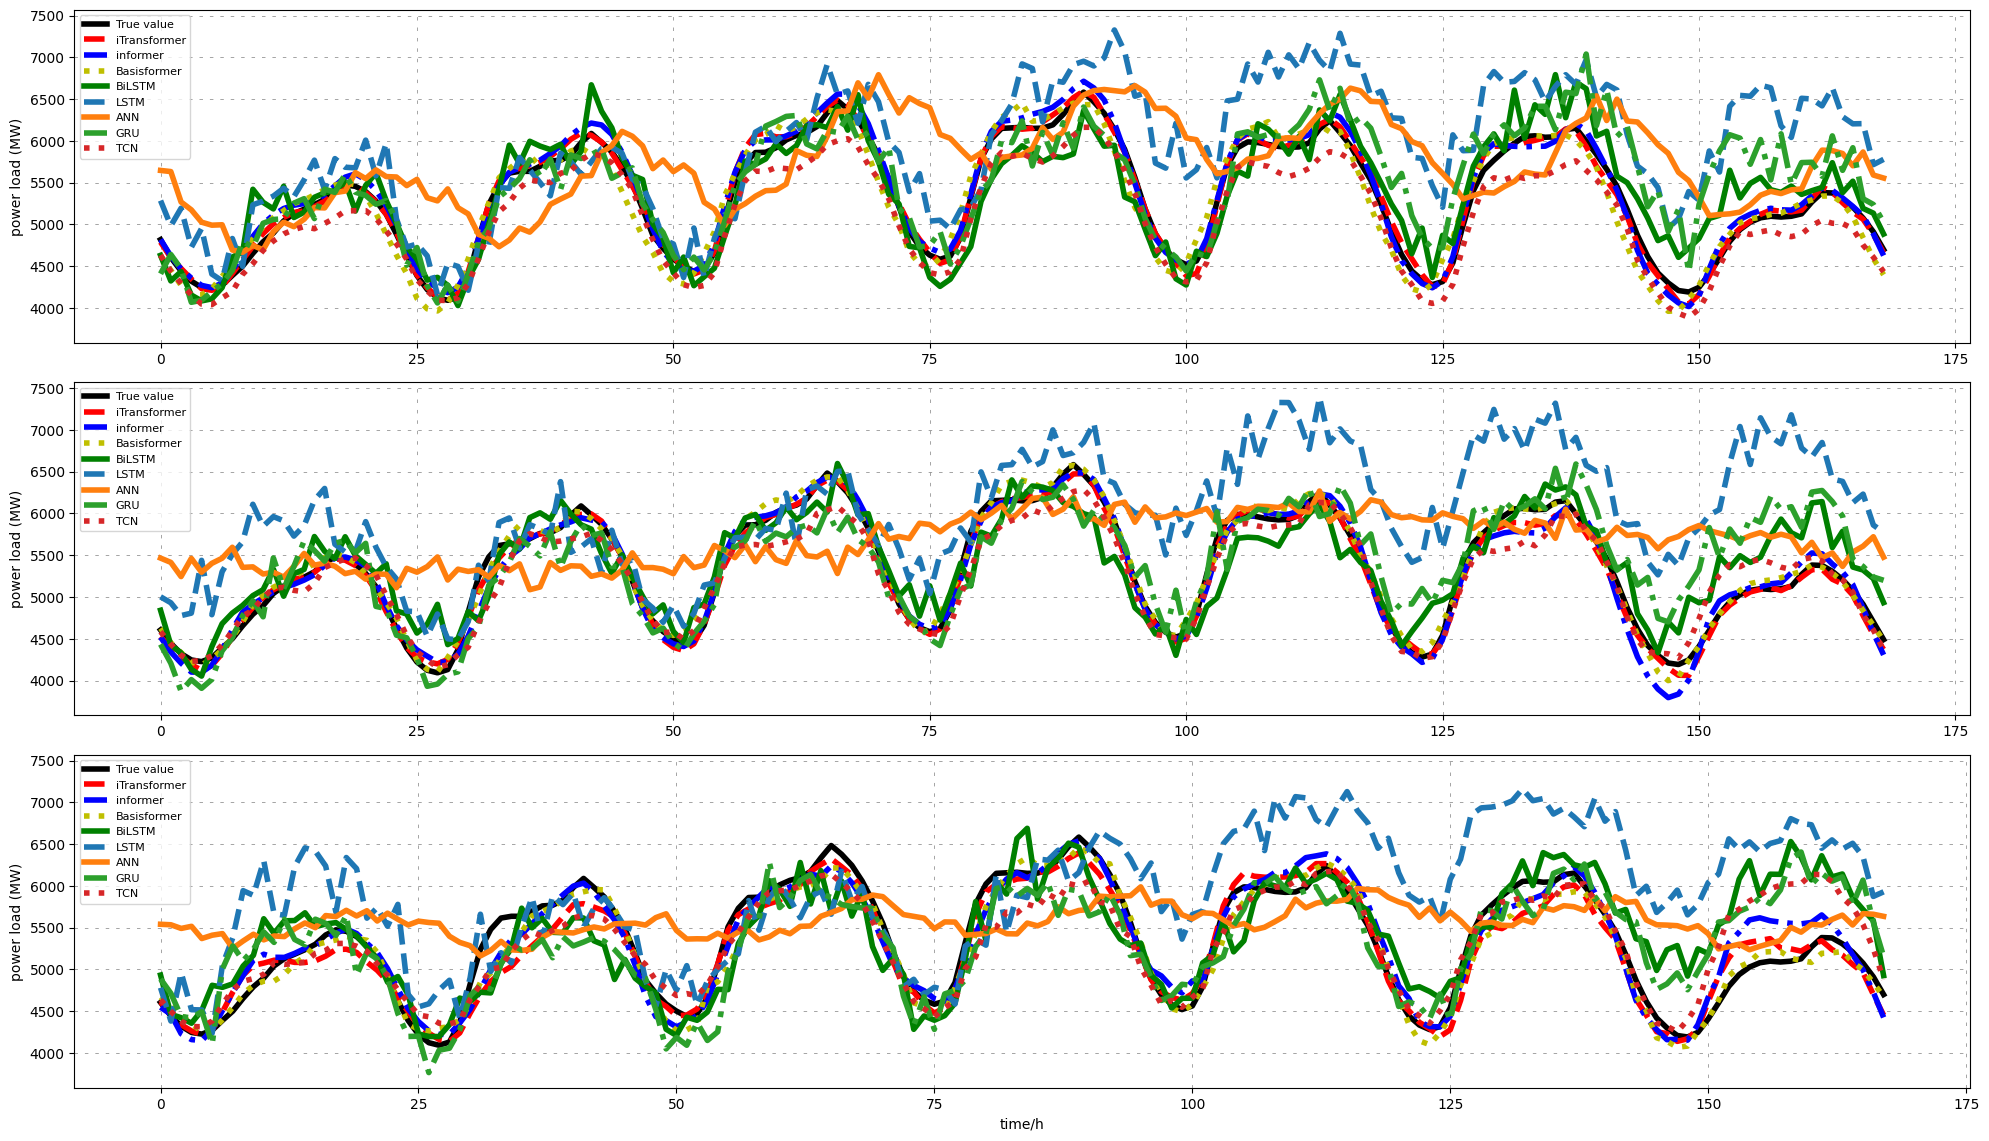

In [33]:
import matplotlib.pyplot as plt
import numpy as np

true_values = np.array(d.iloc[0,3503:3672])  # True values
iTransformer = np.array(d.iloc[1,3503:3672])
informer = np.array(d.iloc[2,3503:3672])
Basisformer = np.array(d.iloc[3,3503:3672])
BiLSTM = np.array(d.iloc[4,3503:3672])
LSTM = np.array(d.iloc[5,3503:3672])
ANN = np.array(d.iloc[6,3503:3672])
GRU = np.array(d.iloc[7,3503:3672])
TCN = np.array(d.iloc[8,3503:3672])
fig, (ax0,ax1,ax2) = plt.subplots(nrows=3, ncols=1, figsize=(20, 12), sharey=True)

ax0.plot(true_values, 'k-', label='True value',linewidth=4)
ax0.plot(iTransformer, 'r--', label='iTransformer',linewidth=4)
ax0.plot(informer, 'b-.', label='informer',linewidth=4)
ax0.plot(Basisformer, 'y:', label='Basisformer',linewidth=4)
ax0.plot(BiLSTM, 'g-', label='BiLSTM',linewidth=4)
ax0.plot(LSTM, '--', label='LSTM',linewidth=4)
ax0.plot(ANN, '-', label='ANN',linewidth=4)
ax0.plot(GRU, '-.', label='GRU',linewidth=4)
ax0.plot(TCN, ':', label='TCN',linewidth=4)
plt.ylabel('power load (MW)')
ax0.set_ylabel('power load (MW)')
ax0.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=8)
line_style = (0, (5, 10))
ax0.grid(True, linestyle=line_style, color='gray', linewidth=0.5)


true_values = np.array(e.iloc[0,3492:3661])  # True values
iTransformer = np.array(e.iloc[1,3492:3661])
informer = np.array(e.iloc[2,3492:3661])
Basisformer = np.array(e.iloc[3,3492:3661])
BiLSTM = np.array(e.iloc[4,3492:3661])
LSTM = np.array(e.iloc[5,3492:3661])
ANN = np.array(e.iloc[6,3492:3661])
GRU = np.array(e.iloc[7,3492:3661])
TCN = np.array(e.iloc[8,3492:3661])


ax1.plot(true_values, 'k-', label='True value',linewidth=4)
ax1.plot(iTransformer, 'r--', label='iTransformer',linewidth=4)
ax1.plot(informer, 'b-.', label='informer',linewidth=4)
ax1.plot(Basisformer, 'y:', label='Basisformer',linewidth=4)
ax1.plot(BiLSTM, 'g-', label='BiLSTM',linewidth=4)
ax1.plot(LSTM, '--', label='LSTM',linewidth=4)
ax1.plot(ANN, '-', label='ANN',linewidth=4)
ax1.plot(GRU, '-.', label='GRU',linewidth=4)
ax1.plot(TCN, ':', label='TCN',linewidth=4)
plt.ylabel('power load (MW)')
ax1.set_ylabel('power load (MW)')
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=8)
line_style = (0, (5, 10))
ax1.grid(True, linestyle=line_style, color='gray', linewidth=0.5)


true_values = np.array(f.iloc[0,3480:3648])  # True values
iTransformer = np.array(f.iloc[1,3480:3648])
informer = np.array(f.iloc[2,3480:3648])
Basisformer = np.array(f.iloc[3,3480:3648])
BiLSTM = np.array(f.iloc[4,3480:3648])
LSTM = np.array(f.iloc[5,3480:3648])
ANN = np.array(f.iloc[6,3480:3648])
GRU = np.array(f.iloc[7,3480:3648])
TCN = np.array(f.iloc[8,3480:3648])



ax2.plot(true_values, 'k-', label='True value',linewidth=4)
ax2.plot(iTransformer, 'r--', label='iTransformer',linewidth=4)
ax2.plot(informer, 'b-.', label='informer',linewidth=4)
ax2.plot(Basisformer, 'y:', label='Basisformer',linewidth=4)
ax2.plot(BiLSTM, 'g-', label='BiLSTM',linewidth=4)
ax2.plot(LSTM, '--', label='LSTM',linewidth=4)
ax2.plot(ANN, '-', label='ANN',linewidth=4)
ax2.plot(GRU, '-.', label='GRU',linewidth=4)
ax2.plot(TCN, ':', label='TCN',linewidth=4)




plt.xlabel('time/h')
plt.ylabel('power load (MW)')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=8)
line_style = (0, (5, 10))
ax2.grid(True, linestyle=line_style, color='gray', linewidth=0.5)
plt.tight_layout(rect=[0, 0, 1, 0.96])
files = 'Power Load Prediction-12,24,36 steps.png'
savedir = '/kaggle/working/'
des_path = os.path.join(savedir,files)
plt.savefig(des_path, dpi = 300)
plt.show()

import matplotlib.pyplot as plt
import numpy as np



true_values = np.array(f.iloc[0,3480:3648])  # True values
iTransformer = np.array(f.iloc[1,3480:3648])
informer = np.array(f.iloc[2,3480:3648])
Basisformer = np.array(f.iloc[3,3480:3648])
BiLSTM = np.array(f.iloc[4,3480:3648])
LSTM = np.array(f.iloc[5,3480:3648])
ANN = np.array(f.iloc[6,3480:3648])
GRU = np.array(f.iloc[7,3480:3648])
TCN = np.array(f.iloc[8,3480:3648])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5), sharey=True)

ax.plot(true_values, 'k-', label='True value')
ax.plot(iTransformer, 'r--', label='iTransformer')
ax.plot(informer, 'b-.', label='informer')
ax.plot(Basisformer, 'y:', label='Basisformer')
ax.plot(BiLSTM, 'g-', label='BiLSTM')
ax.plot(LSTM, '--', label='LSTM')
ax.plot(ANN, '-', label='ANN')
ax.plot(GRU, '-.', label='GRU')
ax.plot(TCN, ':', label='TCN')




plt.xlabel('time/h')
plt.ylabel('power load (MW)')
plt.legend()
line_style = (0, (5, 10))
plt.grid(True, linestyle=line_style, color='gray', linewidth=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
files = 'Power Load Prediction-36steps.png'
savedir = '/kaggle/working/'
des_path = os.path.join(savedir,files)
plt.savefig(des_path, dpi = 300)
plt.show()

In [34]:
a = pd.read_csv('/kaggle/input/itransformer-prediction/iTransformer/12.csv')
b= pd.read_csv('/kaggle/input/itransformer-prediction/iTransformer/24.csv')
c = pd.read_csv('/kaggle/input/itransformer-prediction/iTransformer/36.csv')

In [35]:
a = a.T
b = b.T
c = c.T

In [36]:
d = a.iloc[1:,:]
e = b.iloc[1:,:]
f = c.iloc[1:,:]

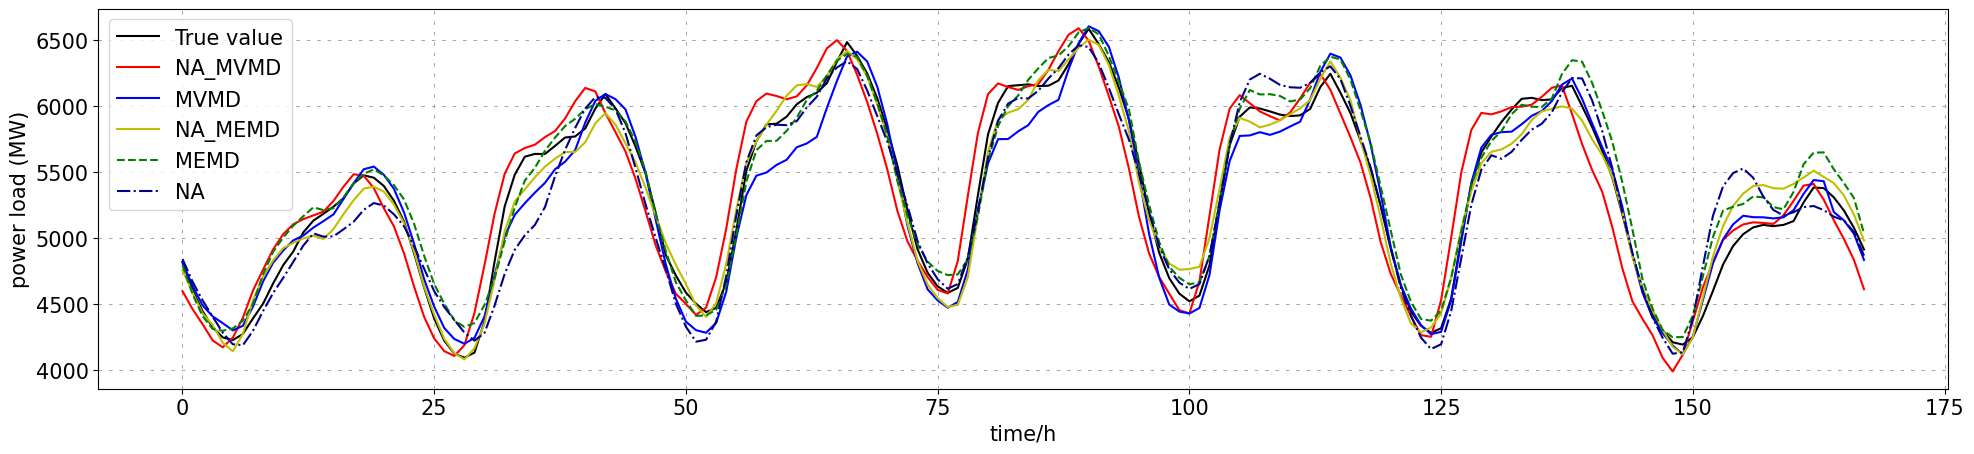

In [68]:
import matplotlib.pyplot as plt
import numpy as np


true_values = np.array(d.iloc[0,3509:3677])   # True values
NA_MVMD =np.array(d.iloc[1,3509:3677]) 
MVMD = np.array(d.iloc[2,3509:3677]) 
NA_MEMD = np.array(d.iloc[3,3509:3677]) 
MEMD = np.array(d.iloc[4,3509:3677]) 
NA = np.array(d.iloc[5,3509:3677]) 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5), sharey=True)

ax.plot(true_values, 'k-', label='True value',)
ax.plot(NA_MVMD, 'r', label='NA_MVMD',)
ax.plot(MVMD, 'b', label='MVMD',)
ax.plot(NA_MEMD, 'y-', label='NA_MEMD')
ax.plot(MEMD, 'g--', label='MEMD')
ax.plot(NA, '-.', label='NA',color='darkblue')



plt.xlabel('time/h')
plt.ylabel('power load (MW)')
plt.legend(loc='upper left')
line_style = (0, (5, 10))
plt.grid(True, linestyle=line_style, color='gray', linewidth=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
files = 'iTransformer-Power Load Prediction-12 steps.png'
savedir = '/kaggle/working/'
des_path = os.path.join(savedir,files)
plt.savefig(des_path, dpi = 300)
plt.show()

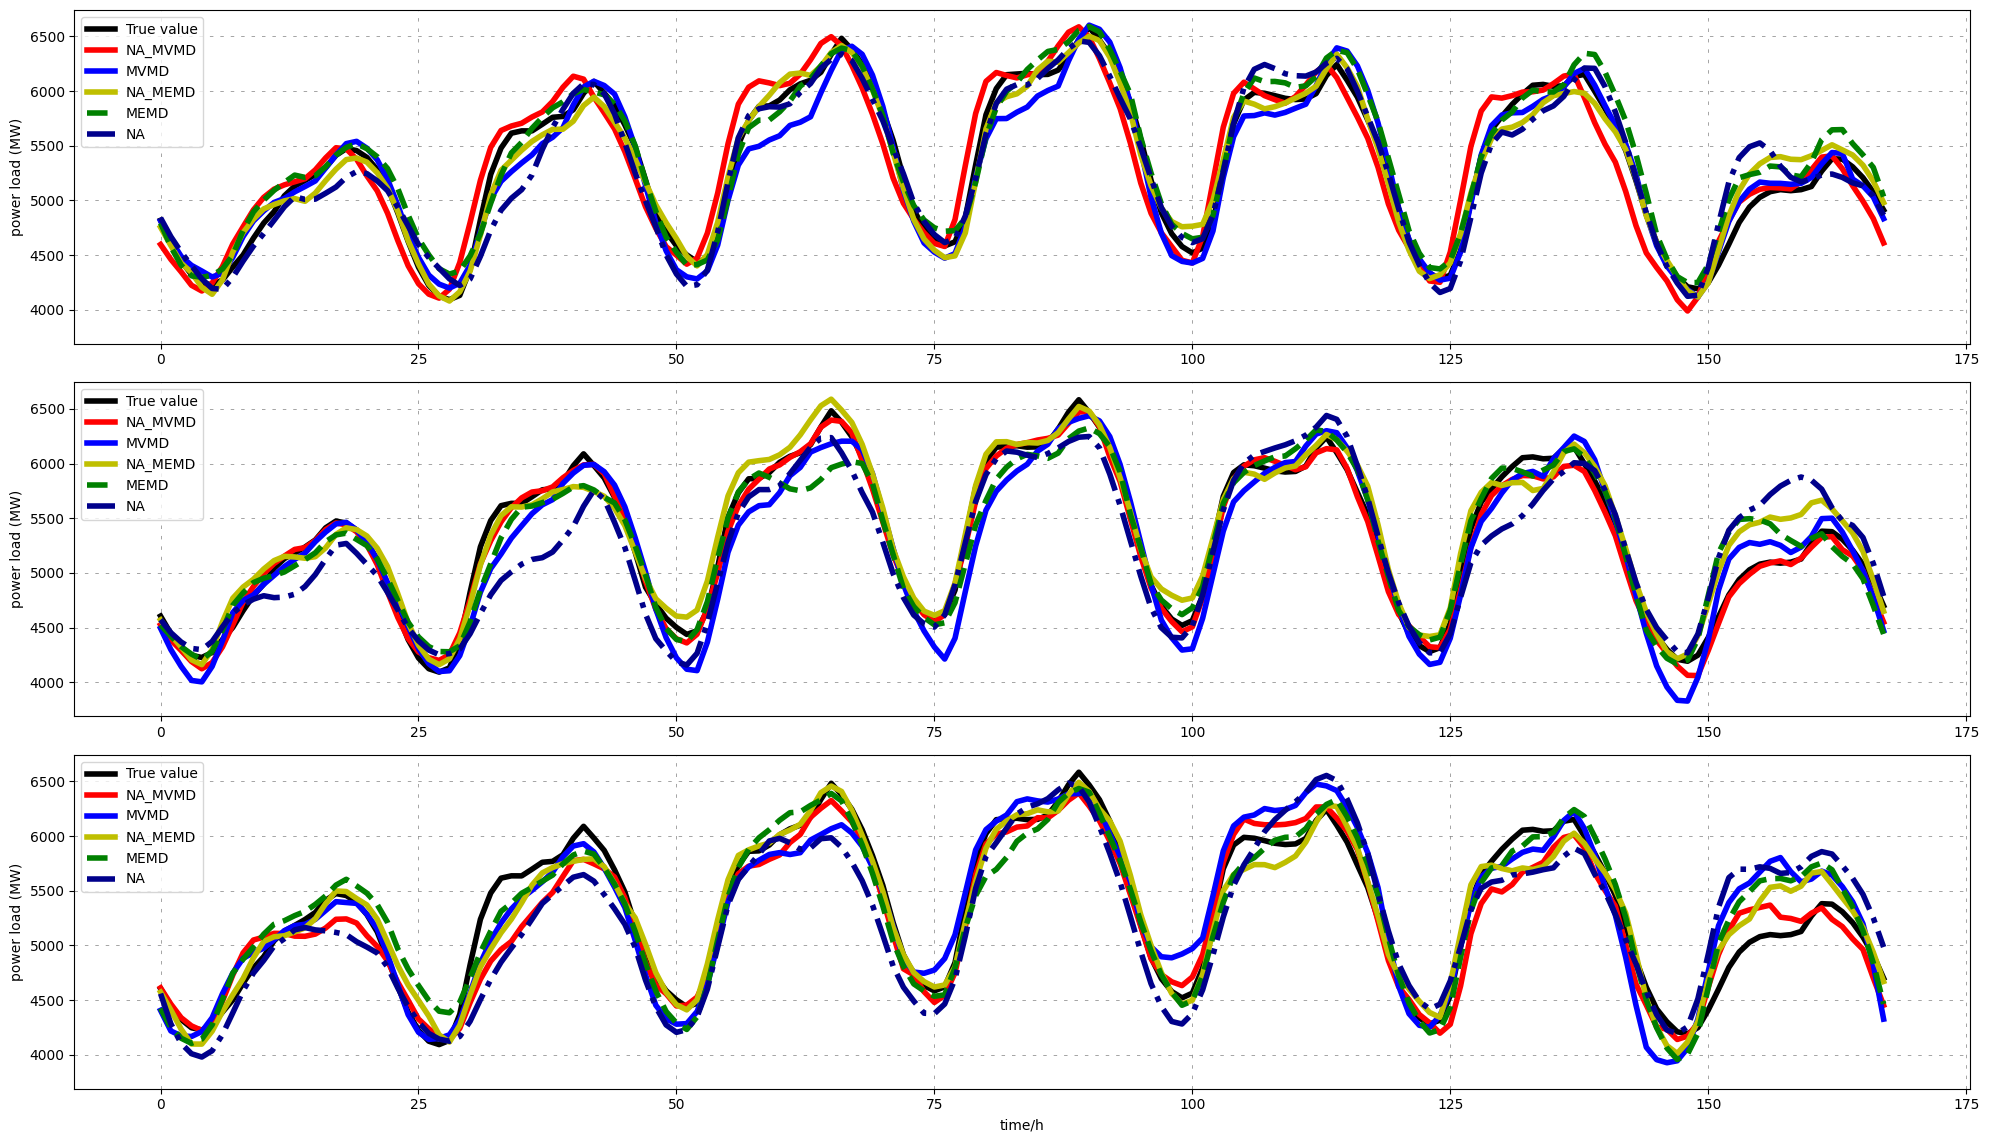

In [37]:
import matplotlib.pyplot as plt
import numpy as np


true_values = np.array(d.iloc[0,3509:3677])   # True values
NA_MVMD =np.array(d.iloc[1,3509:3677]) 
MVMD = np.array(d.iloc[2,3509:3677]) 
NA_MEMD = np.array(d.iloc[3,3509:3677]) 
MEMD = np.array(d.iloc[4,3509:3677]) 
NA = np.array(d.iloc[5,3509:3677]) 
fig, (ax0,ax1,ax2) = plt.subplots(nrows=3, ncols=1, figsize=(20, 12), sharey=True)


ax0.plot(true_values, 'k-', label='True value',linewidth=4)
ax0.plot(NA_MVMD, 'r', label='NA_MVMD',linewidth=4)
ax0.plot(MVMD, 'b', label='MVMD',linewidth=4)
ax0.plot(NA_MEMD, 'y-', label='NA_MEMD',linewidth=4)
ax0.plot(MEMD, 'g--', label='MEMD',linewidth=4)
ax0.plot(NA, '-.', label='NA',color='darkblue',linewidth=4)

plt.xlabel('time/h')
ax0.set_ylabel('power load (MW)')
ax0.legend(loc='upper left',fontsize=10)
line_style = (0, (5, 10))
ax0.grid(True, linestyle=line_style, color='gray', linewidth=0.5)

true_values = np.array(e.iloc[0,3504:3672])   # True values
NA_MVMD =np.array(e.iloc[1,3504:3672]) 
MVMD = np.array(e.iloc[2,3504:3672]) 
NA_MEMD = np.array(e.iloc[3,3504:3672]) 
MEMD = np.array(e.iloc[4,3504:3672]) 
NA = np.array(e.iloc[5,3504:3672]) 



ax1.plot(true_values, 'k-', label='True value',linewidth=4)
ax1.plot(NA_MVMD, 'r', label='NA_MVMD',linewidth=4)
ax1.plot(MVMD, 'b', label='MVMD',linewidth=4)
ax1.plot(NA_MEMD, 'y-', label='NA_MEMD',linewidth=4)
ax1.plot(MEMD, 'g--', label='MEMD',linewidth=4)
ax1.plot(NA, '-.', label='NA',color='darkblue',linewidth=4)
ax1.set_ylabel('power load (MW)')
ax1.legend(loc='upper left',fontsize=10)
line_style = (0, (5, 10))
ax1.grid(True, linestyle=line_style, color='gray', linewidth=0.5)


true_values = np.array(f.iloc[0,3498:3666])   # True values
NA_MVMD =np.array(f.iloc[1,3498:3666]) 
MVMD = np.array(f.iloc[2,3498:3666]) 
NA_MEMD = np.array(f.iloc[3,3498:3666]) 
MEMD = np.array(f.iloc[4,3498:3666]) 
NA = np.array(f.iloc[5,3498:3666]) 


ax2.plot(true_values, 'k-', label='True value',linewidth=4)
ax2.plot(NA_MVMD, 'r', label='NA_MVMD',linewidth=4)
ax2.plot(MVMD, 'b', label='MVMD',linewidth=4)
ax2.plot(NA_MEMD, 'y-', label='NA_MEMD',linewidth=4)
ax2.plot(MEMD, 'g--', label='MEMD',linewidth=4)
ax2.plot(NA, '-.', label='NA',color='darkblue',linewidth=4)


plt.xlabel('time/h')
plt.ylabel('power load (MW)')
plt.legend(loc='upper left',fontsize=10)
line_style = (0, (5, 10))
plt.grid(True, linestyle=line_style, color='gray', linewidth=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
files = 'iTransformer-Power Load Prediction-12,24,36 steps.png'
savedir = '/kaggle/working/'
des_path = os.path.join(savedir,files)
plt.savefig(des_path, dpi = 300)
plt.show()


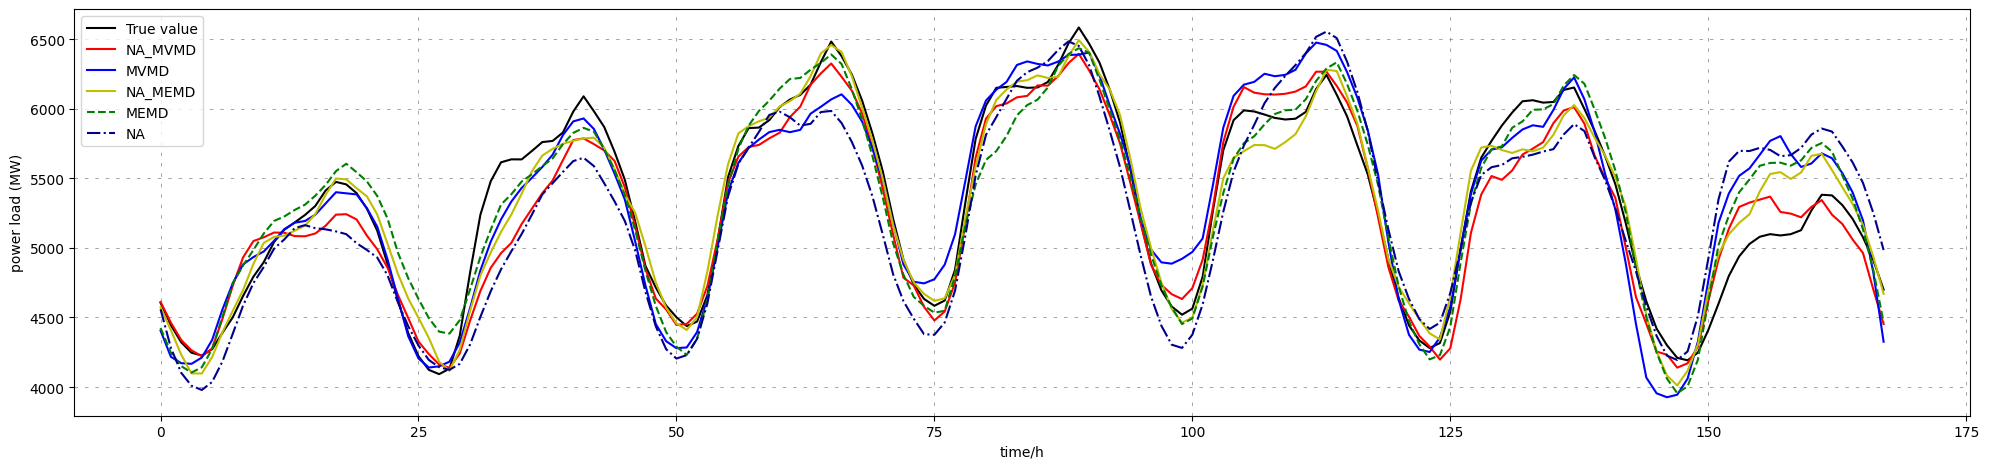

In [32]:
import matplotlib.pyplot as plt
import numpy as np


true_values = np.array(f.iloc[0,3498:3666])   # True values
NA_MVMD =np.array(f.iloc[1,3498:3666]) 
MVMD = np.array(f.iloc[2,3498:3666]) 
NA_MEMD = np.array(f.iloc[3,3498:3666]) 
MEMD = np.array(f.iloc[4,3498:3666]) 
NA = np.array(f.iloc[5,3498:3666]) 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5), sharey=True)

ax.plot(true_values, 'k-', label='True value',)
ax.plot(NA_MVMD, 'r', label='NA_MVMD',)
ax.plot(MVMD, 'b', label='MVMD',)
ax.plot(NA_MEMD, 'y-', label='NA_MEMD')
ax.plot(MEMD, 'g--', label='MEMD')
ax.plot(NA, '-.', label='NA',color='darkblue')



plt.xlabel('time/h')
plt.ylabel('power load (MW)')
plt.legend()
line_style = (0, (5, 10))
plt.grid(True, linestyle=line_style, color='gray', linewidth=0.5)
files = 'iTransformer-Power Load Prediction-36 steps.png'
savedir = '/kaggle/working/'
plt.tight_layout(rect=[0, 0, 1, 0.96])
des_path = os.path.join(savedir,files)
plt.savefig(des_path, dpi = 300)
plt.show()

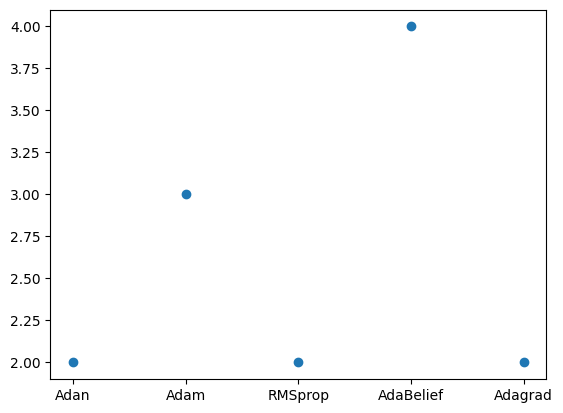

In [33]:
import matplotlib.pyplot as plt
 
# 假设有一组数据点
x = ['Adan','Adam', 'RMSprop', 'AdaBelief', 'Adagrad']
y = [2, 3, 2, 4, 2]
 
# 创建散点图
plt.scatter(x, y)
 
# 显示图表
plt.show()

In [34]:
import pandas as pd

In [35]:
data0 = pd.read_csv('/kaggle/input/dm-test/pred_36.csv', index_col=0)
data1 = data0.iloc[:,:13]
#data2 = data0.iloc[:,29:33]
#data = pd.concat([data1,data2],axis = 1)
data = data1.iloc[:4296,:]
real = data['actural']
forecasts = data.drop(['actural'],axis = 1)

In [36]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import t
import collections

In [37]:
def dm_test(actual_lst, pred1_lst, pred2_lst, h=1, crit="MSE", power=2):
    """
    这个是DM检验的代码
    :param actual_lst: 真实的序列值
    :param pred1_lst: 第一个模型预测的结果
    :param pred2_lst: 第二个模型预测的结果
    :param h: 预测模型是几步预测，h就是几
    :param crit: 计算连个模型的预测偏差，的差值 d 时，使用的公式：有MSE,MAD,MAPE,poly，推荐MSE
    :param power: 只有crit=poly是用这个，计算d时使用： (模型1的偏差)的power次方 - (模型2的偏差)的power次方
    :return:
    """

    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if not isinstance(h, int):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return rt, msg
        # Check the range of h
        if h < 1:
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return rt, msg
        len_act = len(actual_lst)
        len_p1 = len(pred1_lst)
        len_p2 = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2:
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return rt, msg
        # Check range of h
        if h >= len_act:
            rt = -1
            msg = "The number of steps ahead is too large."
            return rt, msg
        # Check if criterion supported
        if crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly":
            rt = -1
            msg = "The criterion is not supported."
            return rt, msg
            # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")

        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True

        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if not (is_actual_ok and is_pred1_ok and is_pred2_ok):
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return rt, msg
        return rt, msg

    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if error_code[0] == -1:
        raise SyntaxError(error_code[1])
        return
    # Import libraries


    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst = []

    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()

    # Length of lists (as real numbers)
    T = float(len(actual_lst))

    # construct d according to crit
    if crit == "MSE":
        for actual, p1, p2 in zip(actual_lst, pred1_lst, pred2_lst):
            e1_lst.append((actual - p1) ** 2)
            e2_lst.append((actual - p2) ** 2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif crit == "MAD":
        for actual, p1, p2 in zip(actual_lst, pred1_lst, pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif crit == "MAPE":
        for actual, p1, p2 in zip(actual_lst, pred1_lst, pred2_lst):
            e1_lst.append(abs((actual - p1) / actual))
            e2_lst.append(abs((actual - p2) / actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif crit == "poly":
        for actual, p1, p2 in zip(actual_lst, pred1_lst, pred2_lst):
            e1_lst.append(((actual - p1)) ** (power))
            e2_lst.append(((actual - p2)) ** (power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)

            # Mean of d
    mean_d = pd.Series(d_lst).mean()

    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N - k):
            autoCov += ((Xi[i + k]) - Xs) * (Xi[i] - Xs)
        return (1 / (T)) * autoCov

    gamma = []
    for lag in range(0, h):
        gamma.append(autocovariance(d_lst, len(d_lst), lag, mean_d))  # 0, 1, 2
    V_d = (gamma[0] + 2 * sum(gamma[1:])) / T
    DM_stat = V_d ** (-0.5) * mean_d
    harvey_adj = ((T + 1 - 2 * h + h * (h - 1) / T) / T) ** (0.5)
    DM_stat = harvey_adj * DM_stat
    # Find p-value
    p_value = 2 * t.cdf(-abs(DM_stat), df=T - 1)

    return p_value

In [38]:
p_values = pd.DataFrame(index=forecasts.columns, columns=forecasts.columns) 

for model1 in forecasts.columns:
    for model2 in forecasts.columns:
            # For the diagonal elemnts representing comparing the same model we directly set a 
            # p-value of 1
        if model1 == model2:
            p_values.loc[model1, model2] = 1
        else:
            p_values.loc[model1, model2] = dm_test(actual_lst=real.values, 
                                                  pred1_lst=forecasts.loc[:, model1].values, 
                                                   pred2_lst=forecasts.loc[:, model2].values,  h=12, crit="MSE")

In [39]:
a = p_values
a = a.iloc[:41,:40]
rows,colums = a.shape
for i in range(rows):
    for j in range(colums):
        if i<j:
            a.iloc[i,j] = 0.12
        

In [40]:
def turn(RGB):
    rgb_0_to_255 = RGB
    # 将其转换为0-1范围
    rgb_0_to_1 = tuple(value / 255 for value in rgb_0_to_255)
    return rgb_0_to_1
#三色
 
R1 = (118,218,145)
R2 = (248,203,127)
R3 = (248,149,136) 
R4 = (124,214,207)
R5 = (145,146,171)
R6 = (120,152,225) 
R7 = (239,166,102)
R8 = (237,221,134)
R9 = (153,135,206)
R10 = (99,178,238)

r1 = turn(R1)
r2 = turn(R2)
r3 = turn(R3)
r4 = turn(R4)
r5 = turn(R5)
r6 = turn(R6)
r7 = turn(R7)
r8 = turn(R8)
r9 = turn(R9)
r10 = turn(R10)
colors = [r1,r4,r2,r3,r6,r5]

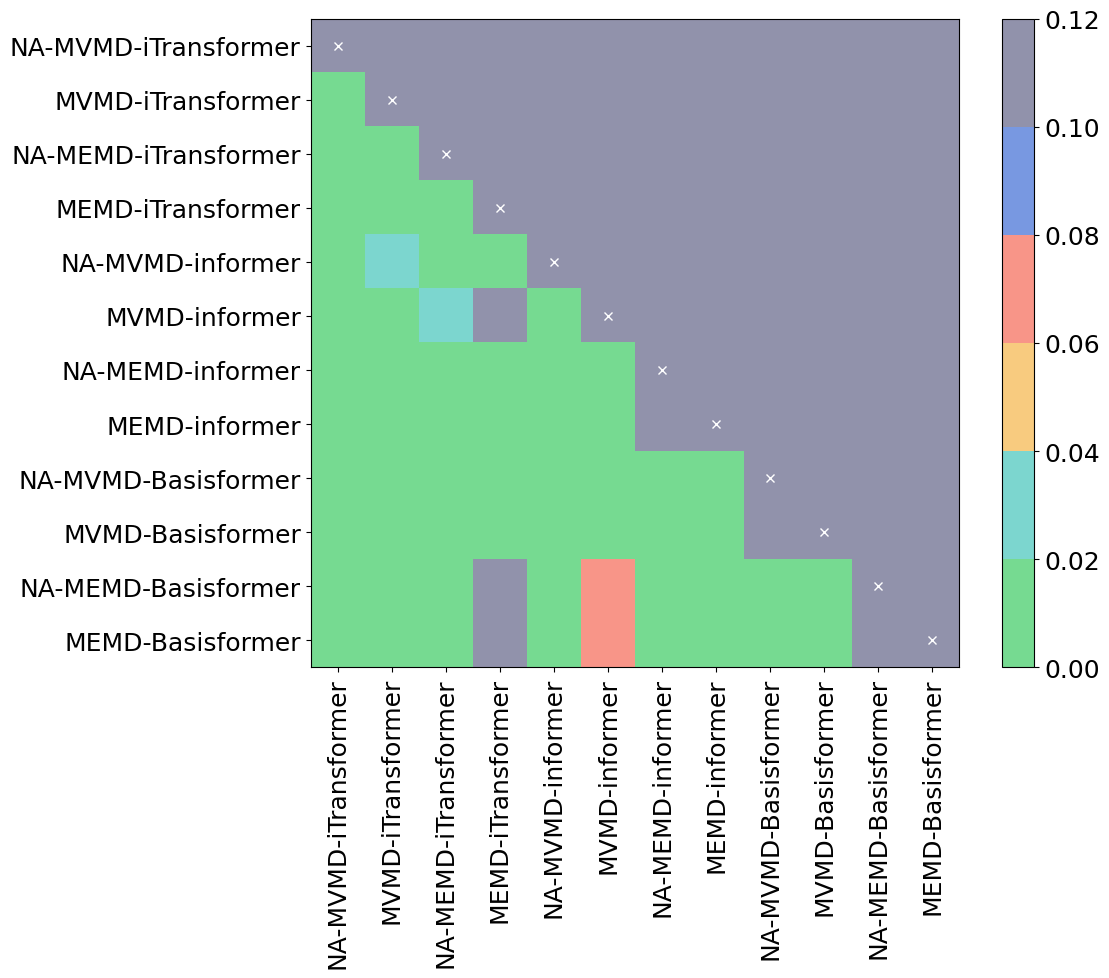

In [41]:
plt.rcParams['font.size'] = 18
plt.subplots(figsize=(12,10)) 
cmap = mpl.colors.ListedColormap(colors)
# Generating figure
plt.imshow(p_values.astype(float).values, cmap=cmap, vmin=0, vmax=0.12)
plt.xticks(range(len(forecasts.columns)), forecasts.columns, rotation=90.)
plt.yticks(range(len(forecasts.columns)), forecasts.columns)
plt.plot(range(p_values.shape[0]), range(p_values.shape[0]), 'wx')
plt.colorbar()
#plt.title(title)
plt.tight_layout()
plt.savefig( 'DM test_36.png', dpi=300)
plt.show()

In [42]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import t
import collections

In [43]:
data = pd.read_csv('/kaggle/input/optimizer/pred_12.csv', index_col=0)

data = data.iloc[:4296,:6]
real = data['actural']
forecasts = data.drop(['actural'],axis = 1)

In [44]:
def dm_test(actual_lst, pred1_lst, pred2_lst, h=1, crit="MSE", power=2):
    """
    这个是DM检验的代码
    :param actual_lst: 真实的序列值
    :param pred1_lst: 第一个模型预测的结果
    :param pred2_lst: 第二个模型预测的结果
    :param h: 预测模型是几步预测，h就是几
    :param crit: 计算连个模型的预测偏差，的差值 d 时，使用的公式：有MSE,MAD,MAPE,poly，推荐MSE
    :param power: 只有crit=poly是用这个，计算d时使用： (模型1的偏差)的power次方 - (模型2的偏差)的power次方
    :return:
    """

    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if not isinstance(h, int):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return rt, msg
        # Check the range of h
        if h < 1:
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return rt, msg
        len_act = len(actual_lst)
        len_p1 = len(pred1_lst)
        len_p2 = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2:
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return rt, msg
        # Check range of h
        if h >= len_act:
            rt = -1
            msg = "The number of steps ahead is too large."
            return rt, msg
        # Check if criterion supported
        if crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly":
            rt = -1
            msg = "The criterion is not supported."
            return rt, msg
            # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")

        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True

        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if not (is_actual_ok and is_pred1_ok and is_pred2_ok):
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return rt, msg
        return rt, msg

    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if error_code[0] == -1:
        raise SyntaxError(error_code[1])
        return
    # Import libraries


    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst = []

    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()

    # Length of lists (as real numbers)
    T = float(len(actual_lst))

    # construct d according to crit
    if crit == "MSE":
        for actual, p1, p2 in zip(actual_lst, pred1_lst, pred2_lst):
            e1_lst.append((actual - p1) ** 2)
            e2_lst.append((actual - p2) ** 2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif crit == "MAD":
        for actual, p1, p2 in zip(actual_lst, pred1_lst, pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif crit == "MAPE":
        for actual, p1, p2 in zip(actual_lst, pred1_lst, pred2_lst):
            e1_lst.append(abs((actual - p1) / actual))
            e2_lst.append(abs((actual - p2) / actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif crit == "poly":
        for actual, p1, p2 in zip(actual_lst, pred1_lst, pred2_lst):
            e1_lst.append(((actual - p1)) ** (power))
            e2_lst.append(((actual - p2)) ** (power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)

            # Mean of d
    mean_d = pd.Series(d_lst).mean()

    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N - k):
            autoCov += ((Xi[i + k]) - Xs) * (Xi[i] - Xs)
        return (1 / (T)) * autoCov

    gamma = []
    for lag in range(0, h):
        gamma.append(autocovariance(d_lst, len(d_lst), lag, mean_d))  # 0, 1, 2
    V_d = (gamma[0] + 2 * sum(gamma[1:])) / T
    DM_stat = V_d ** (-0.5) * mean_d
    harvey_adj = ((T + 1 - 2 * h + h * (h - 1) / T) / T) ** (0.5)
    DM_stat = harvey_adj * DM_stat
    # Find p-value
    p_value = 2 * t.cdf(-abs(DM_stat), df=T - 1)

    return p_value

In [45]:
p_values = pd.DataFrame(index=forecasts.columns, columns=forecasts.columns) 

for model1 in forecasts.columns:
    for model2 in forecasts.columns:
            # For the diagonal elemnts representing comparing the same model we directly set a 
            # p-value of 1
        if model1 == model2:
            p_values.loc[model1, model2] = 1
        else:
            p_values.loc[model1, model2] = dm_test(actual_lst=real.values, 
                                                  pred1_lst=forecasts.loc[:, model1].values, 
                                                   pred2_lst=forecasts.loc[:, model2].values,  h=12, crit="MSE")

In [46]:
a = p_values
a = a.iloc[:41,:40]
rows,colums = a.shape
for i in range(rows):
    for j in range(colums):
        if i<j:
            a.iloc[i,j] = 0.12

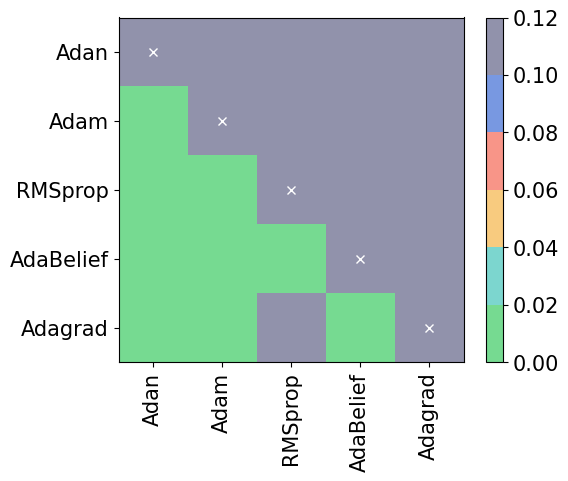

In [47]:
plt.rcParams['font.size'] = 15
plt.subplots(figsize=(6,5)) 
cmap = mpl.colors.ListedColormap(colors)
# Generating figure
plt.imshow(p_values.astype(float).values, cmap=cmap, vmin=0, vmax=0.12)
plt.xticks(range(len(forecasts.columns)), forecasts.columns, rotation=90.)
plt.yticks(range(len(forecasts.columns)), forecasts.columns)
plt.plot(range(p_values.shape[0]), range(p_values.shape[0]), 'wx')
plt.colorbar()
#plt.title(title)
plt.tight_layout()

plt.savefig( 'DM test optimizer_12.png', dpi=400)
plt.show()